In [1]:
from src import func1 as f1
from src import linear_program as lp
import pandas as pd
import numpy as np
import importlib
from matplotlib import pyplot as plt
import geopandas as gpd
import svi_data

In [2]:
importlib.reload(f1)
importlib.reload(lp)

<module 'src.linear_program' from 'c:\\Users\\kcall\\OneDrive - Gainwell Technologies\\Documents\\Underserved_otp\\src\\linear_program.py'>

In [22]:
zip_geo_data = f1.load_zip_geo_data('data/zip_shapes/zip_geo_data.shp')
provider_data = f1.load_provider_data()
year_rates_data = f1.load_rates_data()
states_geo_data = f1.load_states_geo_data('data/state_shapes/states_geo_data.shp')
DIST_THRESH = 16

c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\func1.py:177: DtypeWarning: Columns (12,13,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  rates_data = pd.read_csv('data/prescribing_rates.csv')


In [23]:
importlib.reload(f1)
importlib.reload(lp)

<module 'src.linear_program' from 'c:\\Users\\kcall\\OneDrive - Gainwell Technologies\\Documents\\Underserved_otp\\src\\linear_program.py'>

In [24]:
# Need to sign up for your own key
key = '7ff0bbdbdce6def37dc1ccb38160791e501c1020'

# Download the data from census API
svi_zips = svi_data.get_svi(key,'zip',2019)
svi_zips['ZIP'] = svi_zips['GEO_ID'].str[-5:]

svi_geo = f1.load_zip_geo_data('data/zip_shapes/zip_geo_data.shp')
svi_geo = svi_geo.join(svi_zips.set_index(['ZIP']), on='ZIP', how='left')


c:\Users\kcall\Miniconda3\lib\site-packages\svi_data\svi.py:441: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dc[v] = pd.eval(qs, local_dict=ld, target=dc)
c:\Users\kcall\Miniconda3\lib\site-packages\svi_data\svi.py:441: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dc[v] = pd.eval(qs, local_dict=ld, target=dc)
c:\Users\kcall\Miniconda3\lib\site-packages\svi_data\svi.py:441: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

# West Virginia

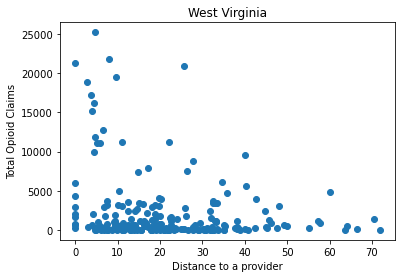

c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\func1.py:310: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return provider_with_geo['geometry'].centroid


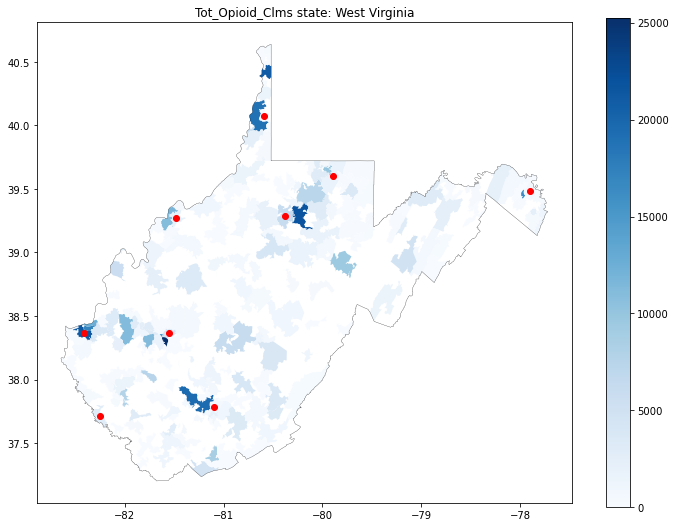

c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\func1.py:310: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return provider_with_geo['geometry'].centroid


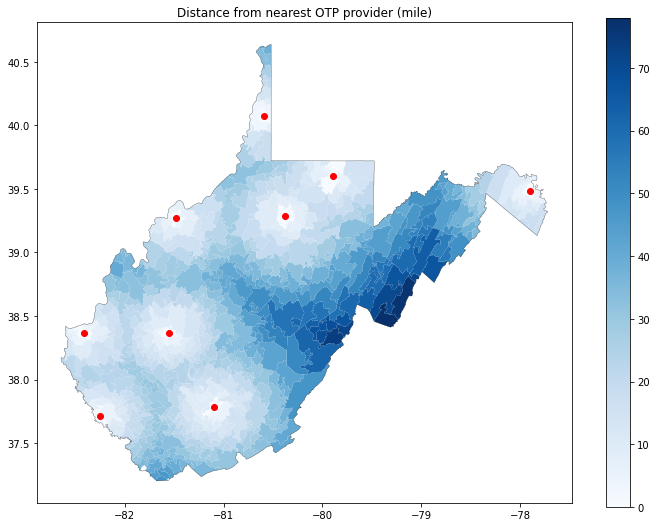

c:\Users\kcall\Miniconda3\lib\site-packages\geopandas\geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\linear_program.py:145: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: ESRI:102008
Right CRS: None

  distances = gpd.GeoSeries(merged['RATES CENTERS']).distance(gpd.GeoSeries(merged['PROVIDER CENTERS']), align=False)


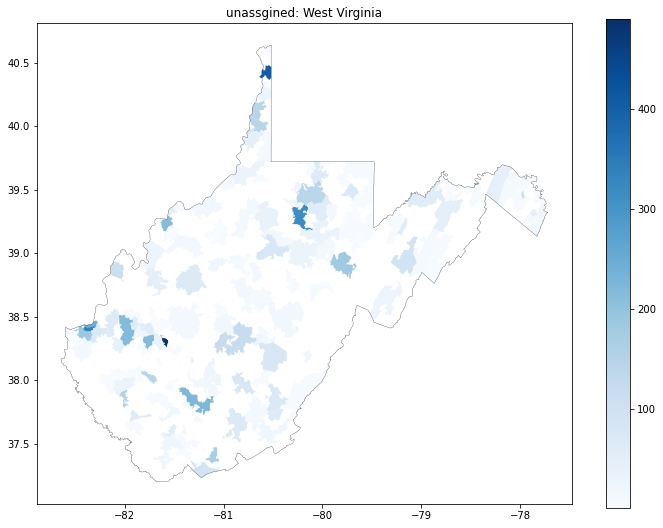

In [25]:
state = 'West Virginia'
f1.distance_scatter_plot(zip_geo_data, provider_data, year_rates_data, state)
f1.plot_rates(states_geo_data, zip_geo_data, year_rates_data, provider_data, 'Tot_Opioid_Clms', state)
f1.plot_dist_to_providers(zip_geo_data, states_geo_data, provider_data, state)
wv_lp = lp.run_model(provider_data, zip_geo_data, year_rates_data, state, DIST_THRESH, True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


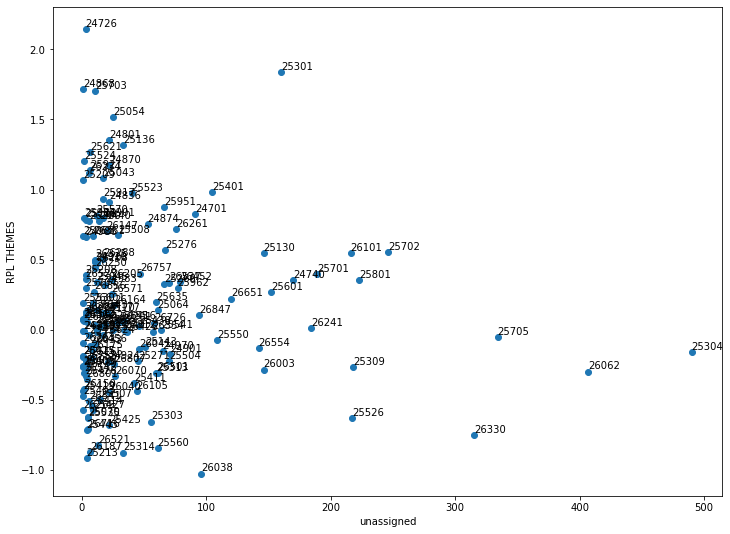

9.35878066478805
-7.497680965783473


In [26]:
svi_unassigned = wv_lp[2].join(svi_zips.set_index(['ZIP']), on='RATES ZIP', how='left')
plt.figure(figsize=(12,9))

plt.scatter(svi_unassigned['picked'], svi_unassigned['RPL_THEMES'])
plt.xlabel('unassigned')
plt.ylabel('RPL THEMES')

labels = svi_unassigned.index
for i, label in enumerate(labels):
    plt.text(svi_unassigned['picked'][i], svi_unassigned['RPL_THEMES'][i]+.02, labels[i])


plt.show()

# print(svi_unassigned[RP])
print(max(svi_zips['RPL_THEMES']))
print(min(svi_zips['RPL_THEMES']))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


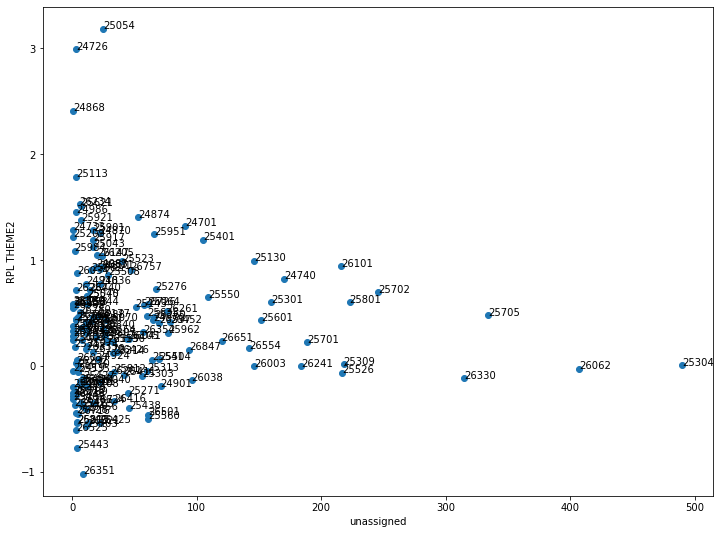

RATES ZIP
24701    1.323800
24726    2.989126
24733    1.284909
24740    0.823183
24801    0.915734
24836    0.775509
24868    2.409513
24870    1.249174
24874    1.401159
24901   -0.195336
24910    0.775216
24924    0.067160
24970    0.429339
24983    0.934586
24986    1.450060
25003    0.244045
25015   -0.259795
25043    1.125712
25045    0.654865
25053    0.375600
25054    3.182587
25064    0.578961
25070   -0.002121
25071    0.189165
25113    1.786182
25130    0.993325
25136    0.228123
25143    0.558986
25165   -0.382514
25177    0.470295
25208    0.427685
25209    1.217697
25213   -0.534926
25260    0.456990
25271   -0.257359
25276    0.725562
25301    0.597756
25303   -0.100396
25304    0.004701
25309    0.014912
25312    0.178606
25313   -0.047118
25314    0.120654
25387         NaN
25401    1.191970
25403   -0.197726
25405   -0.314268
25411   -0.083460
25414   -0.158609
25419   -0.045419
25425   -0.536360
25427   -0.116020
25428   -0.443362
25434   -0.143810
25438   -0.403072


In [27]:
svi_unassigned = wv_lp[2].join(svi_zips.set_index(['ZIP']), on='RATES ZIP', how='left')
labels = svi_unassigned.index
plt.figure(figsize=(12,9))

plt.scatter(svi_unassigned['picked'], svi_unassigned['RPL_THEME2'])
plt.xlabel('unassigned')
plt.ylabel('RPL THEME2')

for i, label in enumerate(labels):
    plt.text(svi_unassigned['picked'][i], svi_unassigned['RPL_THEME2'][i], labels[i])

plt.show()

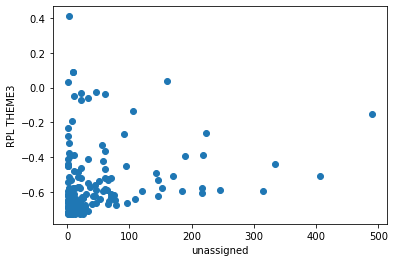

In [28]:
svi_unassigned = wv_lp[2].join(svi_zips.set_index(['ZIP']), on='RATES ZIP', how='left')
plt.scatter(svi_unassigned['picked'], svi_unassigned['RPL_THEME3'])
plt.xlabel('unassigned')
plt.ylabel('RPL THEME3')
plt.show()

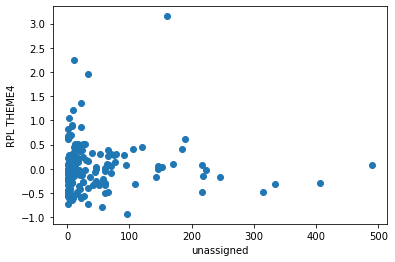

In [29]:
svi_unassigned = wv_lp[2].join(svi_zips.set_index(['ZIP']), on='RATES ZIP', how='left')
plt.scatter(svi_unassigned['picked'], svi_unassigned['RPL_THEME4'])
plt.xlabel('unassigned')
plt.ylabel('RPL THEME4')
plt.show()

# Pennsylvania

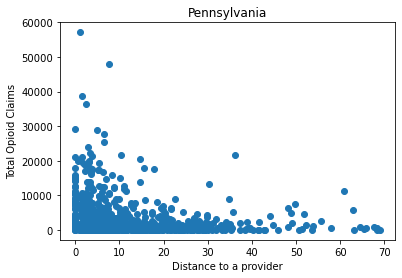

c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\func1.py:310: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return provider_with_geo['geometry'].centroid


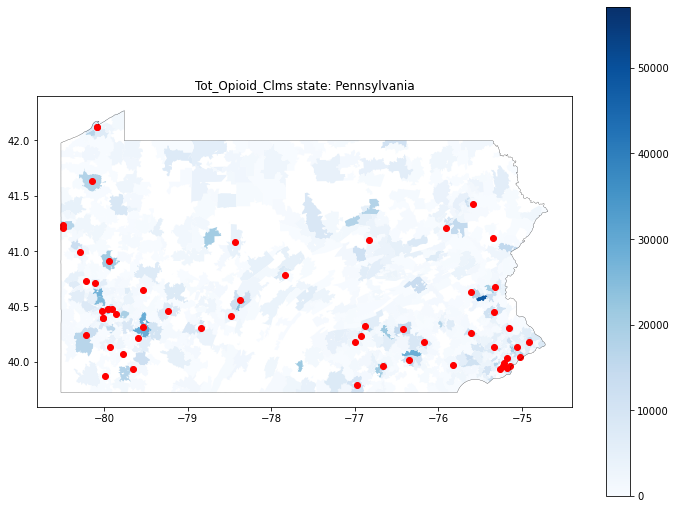

c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\func1.py:310: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return provider_with_geo['geometry'].centroid


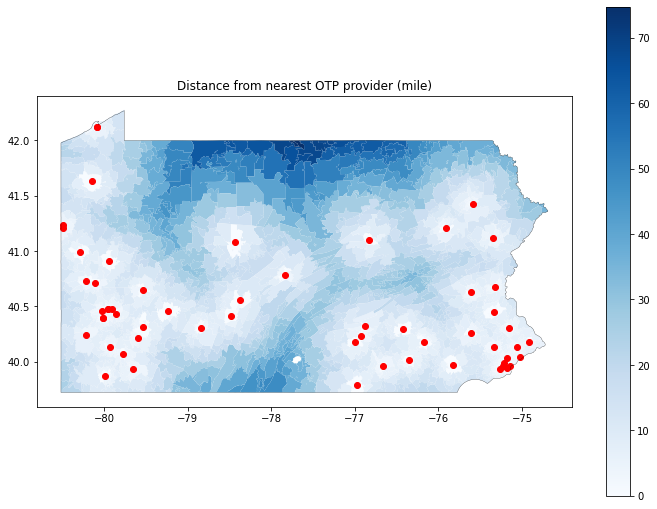

c:\Users\kcall\Miniconda3\lib\site-packages\geopandas\geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
c:\Users\kcall\OneDrive - Gainwell Technologies\Documents\Underserved_otp\src\linear_program.py:145: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: ESRI:102008
Right CRS: None

  distances = gpd.GeoSeries(merged['RATES CENTERS']).distance(gpd.GeoSeries(merged['PROVIDER CENTERS']), align=False)


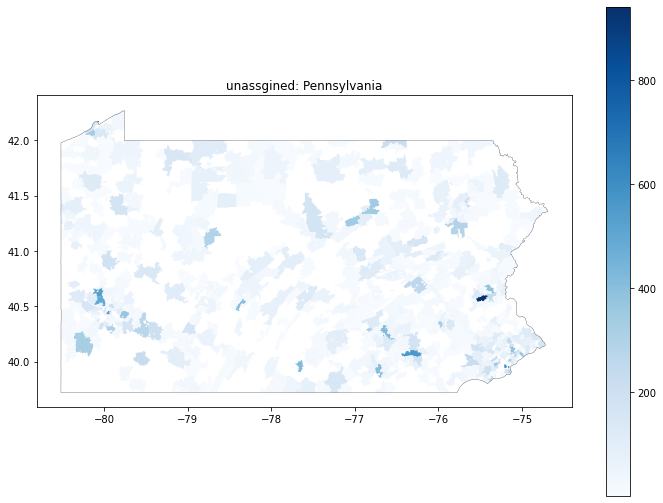

In [30]:
state = 'Pennsylvania'
f1.distance_scatter_plot(zip_geo_data, provider_data, year_rates_data, state)
f1.plot_rates(states_geo_data, zip_geo_data, year_rates_data, provider_data, 'Tot_Opioid_Clms', state)
f1.plot_dist_to_providers(zip_geo_data, states_geo_data, provider_data, state)
penn_lp = lp.run_model(provider_data, zip_geo_data, year_rates_data, state, DIST_THRESH, True)

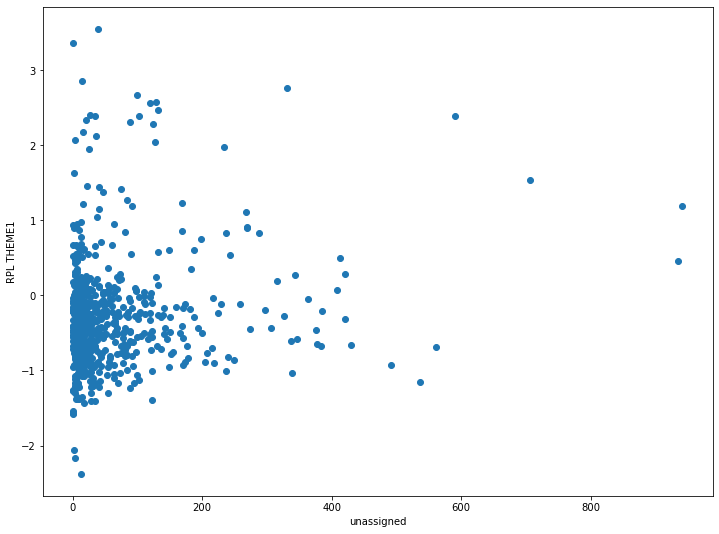

In [31]:
svi_unassigned = penn_lp[2].join(svi_zips.set_index(['ZIP']), on='RATES ZIP', how='left')

plt.figure(figsize=(12,9))
plt.scatter(svi_unassigned['picked'], svi_unassigned['RPL_THEMES'])
plt.xlabel('unassigned')
plt.ylabel('RPL THEME1')
plt.show()